**Model Selection Considerations**

| Data Assumptions | Assumptions Test |
|------|------|
|   Multivariate Timeseries | N/A|
|   Regular Time Series | domain knowledge/put a groupby on it|


In [ ]:
import numpy as np
import pandas as pd
from numpy import sqrt
import matplotlib.pyplot as plt

**Generate some time series data with an anomaly**

In [65]:
def gen_time_series(n):
    time_series = pd.DataFrame([])
    time_sampler = ts.TimeSampler(stop_time=20)
    # Sampling irregular time samples
    irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)
    # Initializing Sinusoidal signal
    sinusoid = ts.signals.Sinusoidal(frequency=0.25)
    # Initializing Gaussian noise
    white_noise = ts.noise.GaussianNoise(std=0.7)
    timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
    outlier_samples, outlier_signals, outlier_errors = timeseries.sample(irregular_time_samples)
    time_series["outlier"] = outlier_samples
    for i in range(n):
        # Initializing Gaussian noise
        white_noise = ts.noise.GaussianNoise(std=0.3)
        # Initializing TimeSeries class with the signal
        timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
        samples, signals, errors = timeseries.sample(irregular_time_samples) 
        time_series[str(i)] = samples
    
    return time_series
        

In [167]:
test = gen_similar_time_series(10)
test.head()

,outlier,0,1,2,3,4,5,6,7,8,9
0,1.420555,0.517702,-0.251239,-0.174108,-0.659780,0.188450,-0.295298,-0.185590,0.289481,0.081470,-0.208159
1,0.719207,-0.199484,0.114481,0.304868,0.294609,0.392652,0.190531,0.127922,0.347317,-0.339341,0.583943
2,0.007086,0.501990,0.234552,0.666125,0.140099,0.174314,0.187739,0.127903,-0.406112,0.300212,0.730233
3,-0.376320,0.555733,0.516886,0.489275,0.223665,0.363063,0.472909,0.090852,0.253550,0.368341,0.264945
4,-0.013553,0.831564,0.376635,0.700240,0.799132,-0.030613,0.581667,0.465191,0.566637,0.562468,1.234670


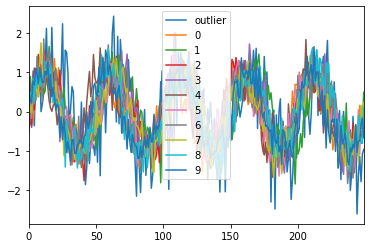

In [79]:
test.plot()

In [80]:
med_abs = test.mad(axis=1, skipna = False)

In [164]:
med_abs_df = pd.DataFrame(med_abs, columns=["med_abs"])
med_abs_df.head()

,med_abs
0,0.258544
1,0.257772
2,0.267551
3,0.274468
4,0.327608


In [165]:
med = test.median(axis=1,skipna = False)

In [166]:
med_df = pd.DataFrame(med, columns=["med"])
med_df.head()

,med
0,0.012410
1,0.202272
2,0.115324
3,0.536183
4,0.503409


In [213]:
score = test.copy()

In [214]:
score = score.sub(med, axis = 0).abs().div(med_abs, axis =0)
score.head()

,outlier,0,1,2,3,4,5,6,7,8,9
0,5.446436,1.954374,1.019742,0.721413,2.599898,0.680892,1.190154,0.765825,1.071659,0.267113,0.853116
1,2.005399,1.558574,0.340575,0.398012,0.358211,0.738561,0.045548,0.288433,0.562686,2.101135,1.480655
2,0.404552,1.445200,0.445625,2.058674,0.092599,0.220479,0.270657,0.047014,1.948920,0.691036,2.298283
3,3.324625,0.071228,0.070308,0.170905,1.138632,0.630750,0.230535,1.622525,1.029748,0.611517,0.988234
4,1.577990,1.001667,0.386970,0.600812,0.902671,1.630062,0.238877,0.116659,0.192998,0.180272,2.232117


In [232]:
binary = score.gt(3)
binary.head()

,outlier,0,1,2,3,4,5,6,7,8,9
0,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [249]:
def mad(data,tolerance):
    med_abs = data.mad(axis=1, skipna = False)
    med = data.median(axis=1,skipna = False)
    score = data.copy()
    score = score.sub(med, axis = 0).abs().div(med_abs, axis =0)
    binary = score.gt(tolerance)
    return binary


In [250]:
mad(test,2.5)

,outlier,0,1,2,3,4,5,6,7,8,9
0,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False,False,False,False,False
246,True,False,False,False,False,False,False,False,False,False,False
247,True,False,False,False,False,False,False,False,False,False,False
248,False,False,False,False,False,True,False,False,False,False,False


Need help. Not sure how to correspond the two DataFrames together element-wise. 

# **UX Proposal**